# SubCipher - Analýza a demonstrace substituční šifry

V tomto notebooku provedeme implementaci a analýzu knihovny SubCipher pro šifrování, dešifrování a kryptoanalýzu substituční šifry.

## Demonstrace šifrování a dešifrování

Ukážeme si základní funkcionalitu šifrování a dešifrování pomocí substituční šifry

In [3]:
from subcipher.cipher import substitute_encrypt, substitute_decrypt

plaintext = "BYL_POZDNI_VECER_PRVNI_MAJ_VECERNI_MAJ_BYL_LASKY_CAS"
key = "DEFGHIJKLMNOPQRSTUVWXYZ_ABC"

ciphertext = substitute_encrypt(plaintext, key)
print(f"Původní text: {plaintext}")
print(f"Použitý klíč: {key}")
print(f"Zašifrovaný text: {ciphertext}")

decrypted = substitute_decrypt(ciphertext, key)
print(f"\nDešifrovaný text: {decrypted}")
print(f"Úspěšnost dešifrování: {'ÚSPĚCH' if decrypted == plaintext else 'NEÚSPĚCH'}")

Původní text: BYL_POZDNI_VECER_PRVNI_MAJ_VECERNI_MAJ_BYL_LASKY_CAS
Použitý klíč: DEFGHIJKLMNOPQRSTUVWXYZ_ABC
Zašifrovaný text: EAOCSRBGQLCYHFHUCSUYQLCPDMCYHFHUQLCPDMCEAOCODVNACFDV

Dešifrovaný text: BYL_POZDNI_VECER_PRVNI_MAJ_VECERNI_MAJ_BYL_LASKY_CAS
Úspěšnost dešifrování: ÚSPĚCH


## Vytvoření a analýza bigramové matice

Nyní vytvoříme bigramovou matici z referenčního textu (Krakatit) a vizualizujeme ji.

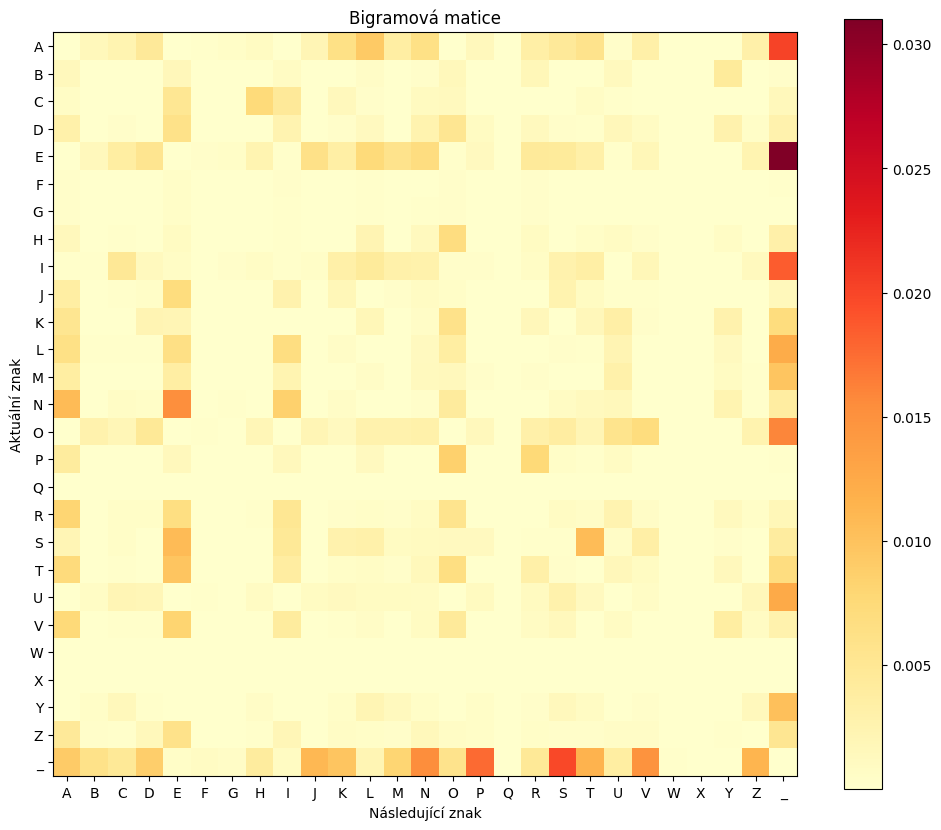

In [14]:
from matplotlib import pyplot as plt
from subcipher.analysis import get_bigrams, transition_matrix
from subcipher.constants import ALPHABET
from subcipher.utils import load_textfile, normalize_text

ref_text = load_textfile("../data_samples/krakatit.txt")
normalized_text = normalize_text(ref_text)

bigrams = get_bigrams(normalized_text)
bigram_matrix = transition_matrix(bigrams, ALPHABET)

plt.figure(figsize=(12, 10))
plt.imshow(bigram_matrix, cmap='YlOrRd')
plt.colorbar()
plt.title('Bigramová matice')
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))
plt.show()

## Automatizovaná kryptoanalýza

Demonstrace automatické kryptoanalýzy na vzorkovém šifrovaném tex

In [12]:
from subcipher.mh_solver import metropolis_hastings

encrypted_text = load_textfile("../data_samples/encrypted/text_500_sample_1_ciphertext.txt")

print("Začínám kryptoanalýzu...")
best_key, best_score = metropolis_hastings(encrypted_text, bigram_matrix)

decrypted_text = substitute_decrypt(encrypted_text, best_key)

print(f"\nNalezený klíč: {best_key}")
print(f"Skóre řešení: {best_score:.4f}")
print(f"\nDešifrovaný text (prvních 100 znaků):")
print(decrypted_text[:100] + "...")

Začínám kryptoanalýzu...
Iteration 500 | current score: -2856.2470 | best score: -2856.2470
Iteration 1000 | current score: -2726.2660 | best score: -2726.2660
Iteration 1500 | current score: -2719.9772 | best score: -2719.9772
Iteration 2000 | current score: -2702.8982 | best score: -2702.8982
Iteration 2500 | current score: -2637.1830 | best score: -2636.3649
Iteration 3000 | current score: -2637.1830 | best score: -2636.3649
Iteration 3500 | current score: -2636.3649 | best score: -2636.3649
Iteration 4000 | current score: -2636.3649 | best score: -2636.3649
Iteration 4500 | current score: -2637.1830 | best score: -2636.3649
Iteration 5000 | current score: -2637.1830 | best score: -2636.3649
Iteration 5500 | current score: -2636.3649 | best score: -2636.3649
Iteration 6000 | current score: -2636.3649 | best score: -2636.3649
Iteration 6500 | current score: -2636.3649 | best score: -2636.3649
Iteration 7000 | current score: -2636.3649 | best score: -2636.3649
Iteration 7500 | current

## Analýza výsledků

Porovnání úspěšnosti dešifrování na různých vzorcích textu.

In [13]:
from subcipher.mh_solver import metropolis_hastings

sample_files = [
    "text_500_sample_1_ciphertext.txt",
    "text_1000_sample_9_ciphertext.txt"
]

results = []
for file in sample_files:
    print(f"\nZpracovávám {file}...")
    encrypted = load_textfile(f"../data_samples/encrypted/{file}")
    key, score = metropolis_hastings(encrypted, bigram_matrix)
    decrypted = substitute_decrypt(encrypted, key)
    results.append({
        'file': file,
        'length': len(encrypted),
        'score': score,
        'sample': decrypted[:100]
    })

for result in results:
    print(f"\nSoubor: {result['file']}")
    print(f"Délka textu: {result['length']}")
    print(f"Skóre: {result['score']:.4f}")
    print(f"Ukázka dešifrovaného textu: {result['sample']}...")


Zpracovávám text_500_sample_1_ciphertext.txt...
Iteration 500 | current score: -2988.5597 | best score: -2988.5597
Iteration 1000 | current score: -2869.1288 | best score: -2869.1288
Iteration 1500 | current score: -2773.7732 | best score: -2773.7732
Iteration 2000 | current score: -2735.1806 | best score: -2735.1806
Iteration 2500 | current score: -2718.4937 | best score: -2717.6757
Iteration 3000 | current score: -2650.9530 | best score: -2650.9530
Iteration 3500 | current score: -2650.9530 | best score: -2650.9530
Iteration 4000 | current score: -2650.1350 | best score: -2650.1350
Iteration 4500 | current score: -2650.1350 | best score: -2650.1350
Iteration 5000 | current score: -2650.9530 | best score: -2650.1350
Iteration 5500 | current score: -2650.9530 | best score: -2650.1350
Iteration 6000 | current score: -2650.1350 | best score: -2650.1350
Iteration 6500 | current score: -2650.9530 | best score: -2650.1350
Iteration 7000 | current score: -2650.1350 | best score: -2650.1350


## Závěr a shrnutí

Na základě provedených experimentů můžeme shrnout následující poznatky:

1. **Šifrování a dešifrování:**
   - Implementace základních funkcí pro šifrování a dešifrování funguje správně
   - Proces je reverzibilní a zachovává integritu dat

2. **Bigramová analýza:**
   - Bigramová matice poskytuje užitečné informace o četnosti přechodů mezi znaky
   - Vizualizace jasně ukazuje nejčastější kombinace znaků v českém textu

3. **Metropolis-Hastings algoritmus:**
   - Úspěšně nachází řešení pro texty různých délek
   - Kvalita řešení závisí na délce vstupního textu

4. **Omezení a možná vylepšení:**
   - Pro kratší texty může být přesnost nižší
   - Možnost vylepšení pomocí dodatečných heuristik
   - Potenciál pro optimalizaci výkonu algoritmu